In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

from scipy import optimize

C:\Users\mfink\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# import the important data data
# import data
raw_df = pd.read_csv('../produced_data_files/final_data_for_viz_thru_2018.csv')
raw_df['pandas_dt'] = raw_df['datetime'].apply(lambda x: pd.to_datetime(x))
raw_df['dayofweek'] = raw_df['pandas_dt'].apply(lambda x: x.dayofweek)
raw_df['weekdayQ'] = np.where(raw_df['dayofweek'] < 5, 1, 0)


In [25]:
daily_df = (raw_df[['year', 'month', 'dayofmonth', 'N01_kWh', 'Dry-bulb (F)']].groupby(['year', 'month', 'dayofmonth']).agg({'N01_kWh': np.sum,
                                                                                                                             'Dry-bulb (F)': np.mean}).reset_index())

In [26]:
daily_df

,year,month,dayofmonth,N01_kWh,Dry-bulb (F)
0,2017,1,1,16.14,35.228028
1,2017,1,2,25.61,28.187743
2,2017,1,3,19.13,35.739278
3,2017,1,4,18.91,37.106677
4,2017,1,5,31.23,27.394468
5,2017,1,6,9.88,24.222096
6,2017,1,7,10.88,19.143209
7,2017,1,8,19.65,10.385406
8,2017,1,9,17.98,10.180797
9,2017,1,10,14.74,21.653368


In [27]:
daily_df.columns = ['year', 'month', 'day', 'energy_consumption_kWh', 'temp_F']
daily_df.to_csv('sample_daily_df.csv')

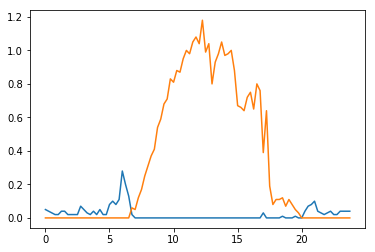

In [17]:
sample_df = raw_df[raw_df['daysincebeginning']==207]
plt.plot(sample_df['hourofday'], sample_df['N01_kWh'])
plt.plot(sample_df['hourofday'], sample_df['NGEN_kWh'])

,Unnamed: 0,IntervalEnd,Interconnect_kWh,N01_kWh,NGEN_kWh,datetime,hour,minute,hourofday,dayofmonth,...,Landfill Gas_m,Refuse_m,Solar_m,Wind_m,Wood_m,Oil_m,Other_m,pandas_dt,dayofweek,weekdayQ
15163,15163,2017-06-09-00:00:00,NaN,0.02,0.00,2017-06-09 00:00:00,0,0,0.00,9,...,0,0,0,1,0,0,0,2017-06-09 00:00:00,4,1
15164,15164,2017-06-09-00:15:00,NaN,0.03,0.00,2017-06-09 00:15:00,0,15,0.25,9,...,0,0,0,1,0,0,0,2017-06-09 00:15:00,4,1
15165,15165,2017-06-09-00:30:00,NaN,0.03,0.00,2017-06-09 00:30:00,0,30,0.50,9,...,0,0,0,1,0,0,0,2017-06-09 00:30:00,4,1
15166,15166,2017-06-09-00:45:00,NaN,0.02,0.00,2017-06-09 00:45:00,0,45,0.75,9,...,0,0,0,1,0,0,0,2017-06-09 00:45:00,4,1
15167,15167,2017-06-09-01:00:00,NaN,0.01,0.00,2017-06-09 01:00:00,1,0,1.00,9,...,0,0,0,1,0,0,0,2017-06-09 01:00:00,4,1
15168,15168,2017-06-09-01:15:00,NaN,0.02,0.00,2017-06-09 01:15:00,1,15,1.25,9,...,0,0,0,0,0,0,0,2017-06-09 01:15:00,4,1
15169,15169,2017-06-09-01:30:00,NaN,0.04,0.00,2017-06-09 01:30:00,1,30,1.50,9,...,0,0,0,0,0,0,0,2017-06-09 01:30:00,4,1
15170,15170,2017-06-09-01:45:00,NaN,0.04,0.00,2017-06-09 01:45:00,1,45,1.75,9,...,0,0,0,0,0,0,0,2017-06-09 01:45:00,4,1
15171,15171,2017-06-09-02:00:00,NaN,0.03,0.00,2017-06-09 02:00:00,2,0,2.00,9,...,0,0,0,0,0,0,0,2017-06-09 02:00:00,4,1
15172,15172,2017-06-09-02:15:00,NaN,0.01,0.00,2017-06-09 02:15:00,2,15,2.25,9,...,0,0,0,0,0,0,0,2017-06-09 02:15:00,4,1


In [42]:
list(raw_df.columns)

['Unnamed: 0',
 'IntervalEnd',
 'Interconnect_kWh',
 'N01_kWh',
 'NGEN_kWh',
 'datetime',
 'hour',
 'minute',
 'hourofday',
 'dayofmonth',
 'month',
 'year',
 'dayofyear',
 'daysincebeginning',
 'Timestamp',
 'Dew point (C)',
 'Dew point (F)',
 'Dry-bulb (C)',
 'Dry-bulb (F)',
 'RHum (%)',
 'Sea level pressure (mbar)',
 'Station pressure (mbar)',
 'degree of saturation',
 'humidity ratio',
 'enthalpy (J/g ref 0C)',
 'enthalpy (Btu/lbm ref 0F)',
 'specific volume (m^3/kg)',
 'specific volume (ft^3/lbm)',
 'wet bulb temperature (C)',
 'wet bulb temperature (F)',
 'Hr_End',
 'DA_Demand',
 'RT_Demand',
 'DA_LMP',
 'DA_EC',
 'DA_CC',
 'DA_MLC',
 'RT_LMP',
 'RT_EC',
 'RT_CC',
 'RT_MLC',
 'Dry_Bulb',
 'Dew_Point',
 'produced_Wh',
 'solaredge_kW',
 'month_diff',
 'new_month',
 'net_energy_kWh',
 'net_power_kW',
 'rolling_sum',
 'credit',
 'plot_hour',
 'pd_date',
 'Begin Date',
 'Coal',
 'Natural Gas',
 'Nuclear',
 'Hydro',
 'Landfill Gas',
 'Refuse',
 'Solar',
 'Wind',
 'Wood',
 'Oil',
 'Othe

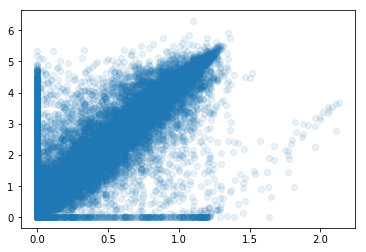

In [37]:
plt.scatter(raw_df['NGEN_kWh'], raw_df['solaredge_kW'], alpha=0.1)

In [47]:
raw_df['solaredge_to_gmp_gen_ratio'] = raw_df['solaredge_kW'] / raw_df['NGEN_kWh']

In [49]:
raw_df['solaredge_to_gmp_gen_ratio'].mean(), raw_df['solaredge_to_gmp_gen_ratio'].median(), raw_df['solaredge_to_gmp_gen_ratio'].mode()

(inf, 5.9088027499999995, 0    inf
 dtype: float64)

(array([ 67.,  71.,  68.,  83.,  74.,  87., 114., 105., 115., 126., 135.,
        147., 161., 146., 134., 144., 184., 184., 205., 228., 299., 328.,
        436., 535., 602., 650., 551., 539., 485., 469., 380., 344., 357.,
        321., 271., 273., 249., 233., 226.]),
 array([3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 ,
        3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85, 3.9 , 3.95, 4.  , 4.05,
        4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 , 4.45, 4.5 , 4.55, 4.6 ,
        4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95]),
 <a list of 39 Patch objects>)

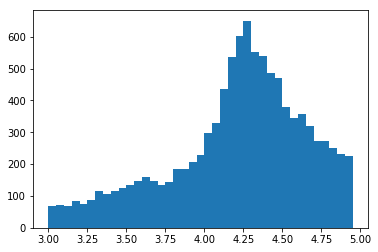

In [52]:
sam = raw_df[raw_df['solaredge_to_gmp_gen_ratio'] < 20]
plt.hist(sam['solaredge_to_gmp_gen_ratio'], bins=np.arange(3,5,0.05))

In [45]:
test = raw_df[['daysincebeginning', 'NGEN_kWh', 'solaredge_kW']].groupby('daysincebeginning').agg(np.sum)

In [46]:
test['test_column'] = test['NGEN_kWh']*4
test['ratio'] = test

,NGEN_kWh,solaredge_kW
daysincebeginning,,
60,7.48,38.105006
61,5.64,68.731166
62,1.39,10.806635
63,1.21,10.126880
64,0.00,6.473581
65,11.79,53.027208
66,11.42,56.297585
67,4.45,39.261032
68,1.37,10.338875
